Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

## Read FIDAS files

In [1]:
import datetime
import pandas as pd

In [62]:
dates = [datetime.date.today() + datetime.timedelta(days=i) for i in range(-6, 1, 1)]
dates

[datetime.date(2016, 12, 28),
 datetime.date(2016, 12, 29),
 datetime.date(2016, 12, 30),
 datetime.date(2016, 12, 31),
 datetime.date(2017, 1, 1),
 datetime.date(2017, 1, 2),
 datetime.date(2017, 1, 3)]

In [71]:
df = pd.DataFrame()
for date in dates:
    fileIn = "DATA4LSCE/GIF_" + date.strftime("%Y%m%d") + "_FIDAS_0109.0a"
    print "Reading ", fileIn
    try:
        df = df.append(pd.read_csv(fileIn, sep='\t'))
    except:
        continue

df = df.rename(columns=lambda x: x.strip())            # remove leading space
print df.columns

df['date'] = pd.to_datetime(df['date     time'], format='%Y-%m-%d %H:%M:%S')    # first column is 'date time'

df = df.set_index('date')
df = df.sort_index()
df = df.drop_duplicates()
print len(df)

Reading  DATA4LSCE/GIF_20161228_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161229_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161230_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161231_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20170101_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20170102_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20170103_FIDAS_0109.0a
Index([u'date     time', u'PM1', u'PM2.5', u'PM4', u'PM10', u'PM-total',
       u'Concentration', u'Rh', u'AT', u'AP', u'flag-Flow',
       u'flag-Coincidence', u'flag-Pumps', u'flag-Weather_Station',
       u'flag-IADS', u'flag-Calibration', u'flag-LED', u'flag-Operating_Mode',
       u'flag-device_status', u'Flowrate', u'Velocity', u'Pumps',
       u'Coincidence', u'Pump_Output', u'IADS-T', u'Raw_Channel_Deviation',
       u'LED-T', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9',
       u'X10', u'X11', u'X12'],
      dtype='object')
8488


In [72]:
df.head()

,date time,PM1,PM2.5,PM4,PM10,PM-total,Concentration,Rh,AT,AP,...,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
date,,,,,,,,,,,,,,,,,,,,,
2016-12-28 00:00:44,2016-12-28 00:00:44,14.800538,18.824492,21.475439,23.006790,24.759107,376.429108,93.797695,1.690305,1024.519287,...,13.67,10.70,15.89,4.80,9.97,0.81,44.32,45.4,3.97,22.65
2016-12-28 00:01:43,2016-12-28 00:01:43,14.767405,18.795185,21.446172,22.930838,24.658881,381.035706,93.866377,1.691564,1024.491699,...,13.58,10.69,15.78,4.81,10.03,1.02,44.30,45.5,3.99,22.65
2016-12-28 00:02:43,2016-12-28 00:02:43,14.721337,18.769666,21.458248,22.888076,24.597739,379.089722,93.866377,1.691564,1024.491699,...,13.53,10.71,15.74,4.81,10.00,0.81,44.30,45.5,3.98,22.65
2016-12-28 00:03:43,2016-12-28 00:03:43,14.683243,18.772269,21.520963,22.865773,24.545273,382.157928,93.917125,1.697859,1024.464233,...,13.48,10.77,15.71,4.81,10.01,0.69,44.30,45.5,3.89,22.61
2016-12-28 00:04:44,2016-12-28 00:04:44,14.647926,18.730892,21.504240,22.569138,23.849473,379.778687,93.917125,1.697859,1024.464233,...,13.08,10.76,14.42,4.81,10.03,0.89,44.30,45.5,3.72,22.61


In [73]:
df.index

DatetimeIndex(['2016-12-28 00:00:44', '2016-12-28 00:01:43',
               '2016-12-28 00:02:43', '2016-12-28 00:03:43',
               '2016-12-28 00:04:44', '2016-12-28 00:05:44',
               '2016-12-28 00:06:44', '2016-12-28 00:07:44',
               '2016-12-28 00:08:44', '2016-12-28 00:09:44',
               ...
               '2017-01-03 09:52:44', '2017-01-03 09:53:44',
               '2017-01-03 09:54:44', '2017-01-03 09:55:44',
               '2017-01-03 09:56:44', '2017-01-03 09:57:44',
               '2017-01-03 09:58:44', '2017-01-03 09:59:44',
               '2017-01-03 10:00:43', '2017-01-03 10:01:43'],
              dtype='datetime64[ns]', name=u'date', length=8488, freq=None)

## resampling

In [86]:
print len(df)
df_resampled = df.resample('1T').mean()
#df_resampled = df.resample('1H').mean()
print len(df_resampled)

8488
9242


### colors

In [81]:
# from https://github.com/mbostock/d3/wiki/Ordinal-Scales\n",
#colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17bec"]
colors = ["#8c564b","#1f77b4","#2ca02c","#d62728","#9467bd","#e377c2","#7f7f7f","#bcbd22","#17bec"]

## bokeh

In [82]:
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show, save, ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.models import HoverTool, BoxAnnotation, Span, Label
from bokeh.palettes import Set1_8, Set2_8
from bokeh.models import Range1d

bk.output_notebook()

Loading BokehJS ...

In [87]:
#output_file("file.html", title='a title', mode='inline')

source = ColumnDataSource(data=dict(
        date = df_resampled.index,
        #datestr = df['date     time'],
        datestr = df_resampled.index.strftime("%Y-%m-%d %H:%M"),
        varPM10 = df_resampled['PM10'],
        varPM2_5 = df_resampled['PM2.5']) )

hover1 = HoverTool(tooltips=[("date, PM10, PM2.5", "(@datestr, @varPM10, @varPM2_5)")])
tools1 = ["pan,resize,wheel_zoom,crosshair",hover1,"reset,save"]

plot1 = figure(plot_width=800, plot_height=500, x_axis_type="datetime", min_border=10, tools=tools1)
formats = {'years': ["%Y"], 'months': ["%b-%y"],'days': ["%d-%b-%y"], 'hours': ["%H:%M"]}
plot1.axis[0].formatter = DatetimeTickFormatter(years="%Y", months="%b-%y", days="%d-%b-%y", hours="%H:%M")

#for i,var in enumerate(['PM-total', 'PM10', 'PM4', 'PM2.5', 'PM1']):
#for i,var in enumerate(['PM10', 'PM2.5']):
#    plot1.line(df.index, df[var], line_alpha=1.0, line_join="round", 
#                    line_color=colors[i], line_width=2, legend=var)
    
plot1.line('date', 'varPM10', source=source, line_alpha=1.0, line_join="round", 
                       line_color=colors[0], line_width=1, legend='PM10')
plot1.line('date', 'varPM2_5', source=source, line_alpha=1.0, line_join="round", 
                       line_color=colors[1], line_width=1, legend='PM2.5')

plot1.add_layout(Span(dimension='width', location=50, line_color='orange', line_dash='dashed', line_width=2))
plot1.add_layout(Span(dimension='width', location=80, line_color='red', line_dash='dashed', line_width=2))

plot1.add_layout(Label(x=40, y=80, x_units='screen', text="Seuil d'alerte PM10", 
                           text_font_size='12px', text_font_style='italic', text_color='gray'))
plot1.add_layout(Label(x=40, y=50, x_units='screen', text="Seuil d'information PM10", 
                           text_font_size='12px', text_font_style='italic', text_color='gray'))

plot1.title.text = 'LSCE FIDAS'
plot1.legend.location = 'top_left'
plot1.y_range = Range1d(0, 100)

show(plot1)

# Save an HTML file
#save(plot1)

## matplotlib

In [10]:
import datetime
import numpy as np
import matplotlib

# If not from a notebook
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator, DateFormatter
import matplotlib.dates as mdates

matplotlib.rcParams['font.family'] = 'DejaVu Sans'

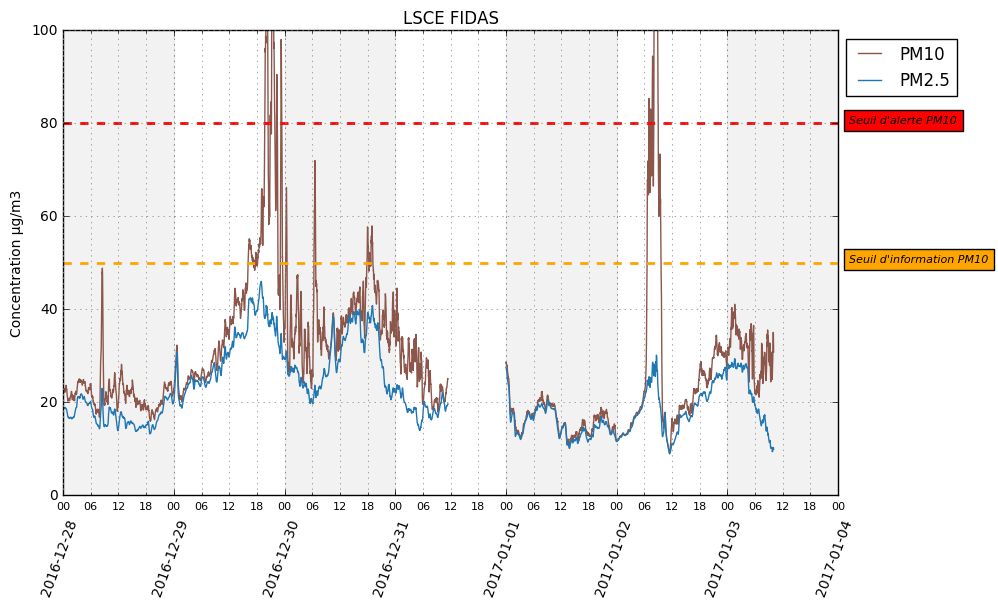

In [88]:
fig, ax = plt.subplots(figsize=(10,6))

#for i,var in enumerate(['PM-total', 'PM10', 'PM4', 'PM2.5', 'PM1']):
for i,var in enumerate(['PM10', 'PM2.5']):
    plt.plot(df_resampled.index, df_resampled[var], linewidth=1, label=var, color=colors[i])
    
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d    '))
ax.xaxis.set_major_locator(DayLocator(interval=1))

#ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_minor_locator(HourLocator(interval=6))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))

x = ax.get_xlim()
ax.set_xlim([np.floor(x[0]), np.ceil(x[1])])
y = ax.get_ylim()
#ax.set_ylim([0, y[1]])
ax.set_ylim([0, 100])

xplace = np.ceil(x[1])+0.1
ax.axhline(y=80, color='red', linewidth=2, linestyle='dashed')
ax.text(xplace, 80, "Seuil d'alerte PM10", ha='left', fontsize=8, style='italic', bbox=dict(facecolor='red'))

ax.axhline(y=50, color='orange', linewidth=2, linestyle='dashed')
ax.text(xplace, 50, "Seuil d'information PM10", ha='left', fontsize=8, style='italic', bbox=dict(facecolor='orange'))

plt.legend(loc=2, bbox_to_anchor=(1.0, 1.0))
plt.title("LSCE FIDAS")
#plt.xlabel('Time')
plt.ylabel(u'Concentration μg/m3')
plt.grid(color='gray', axis='both', which='both')

labels = ax.get_xmajorticklabels()
plt.setp(labels, rotation=70, fontsize=10)
labels = ax.get_xminorticklabels()
plt.setp(labels, fontsize=8)

startDate = int(np.floor(x[0])%2)
for i in np.arange(startDate, len(dates), 2):
    #print dates[i]
    plt.axvspan(dates[i], dates[i]+datetime.timedelta(days=1), color='gray', alpha=0.1)

#plt.gcf().autofmt_xdate()

plt.savefig("GIF_FIDAS_0109.0a.png", bbox_inches='tight', dpi=100)

plt.show()

plt.close()